In [1]:
from affinis.sample import _random_walk, _random_tree_jump
from affinis.plots import hinton
from affinis import utils
# from affinis.utils import _rank1_update, _rank1_downdate 
from affinis.proximity import forest
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import networkx as nx
from scipy.spatial.distance import squareform
from scipy.sparse import csr_array, coo_array

from itertools import pairwise, count, chain, takewhile
from toolz import groupby, countby, mapcat

## Cut-bridge

/tmp/ipykernel_405350/3721786086.py:14: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  B = nx.incidence_matrix(tree, oriented=True).toarray().T


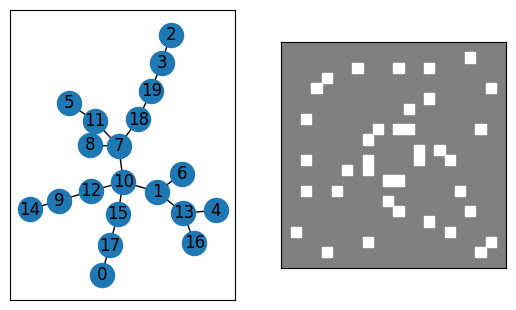

In [7]:
# def forest(L, β=1):
#     return np.linalg.inv(np.eye(L.shape[0])+β*L)

# def rank1_downdate(B,u):
#     return B + (B @ u) @ (u.T @ B) / (1 - u.T @ B @ u)


tree = nx.random_tree(20)
pos=nx.layout.kamada_kawai_layout(tree)


A=nx.to_numpy_array(tree)
Q=forest(L:=nx.laplacian_matrix(tree).toarray())
B = nx.incidence_matrix(tree, oriented=True).toarray().T
plt.subplot(121, aspect='equal')
nx.draw_networkx(tree, pos=pos)
plt.subplot(122)
hinton(A)

In [10]:
bridge_p = squareform(Q, checks=False)
# cut_p = squareform(A)
# cut_p = np.ones(9)/9
# cut_p, bridge_p

In [11]:
from affinis.sample import _random_tree_gibbs

tree_gen = _random_tree_gibbs(bridge_p, B)

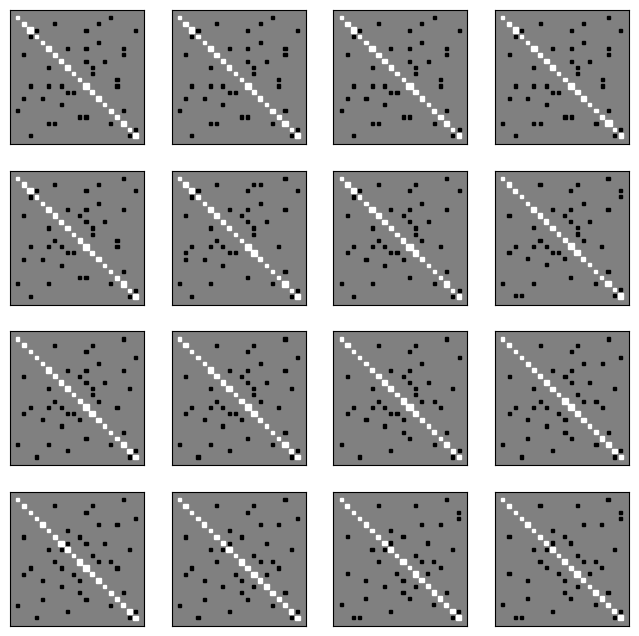

In [13]:
plt.figure(figsize=(8,8))
for i in range(1,17):
    plt.subplot(4,4,i)
    B_new = next(tree_gen)
    hinton(B_new.T@B_new)
    # plt.spy(B_new.T@B_new)

In [14]:
%timeit next(tree_gen)

135 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


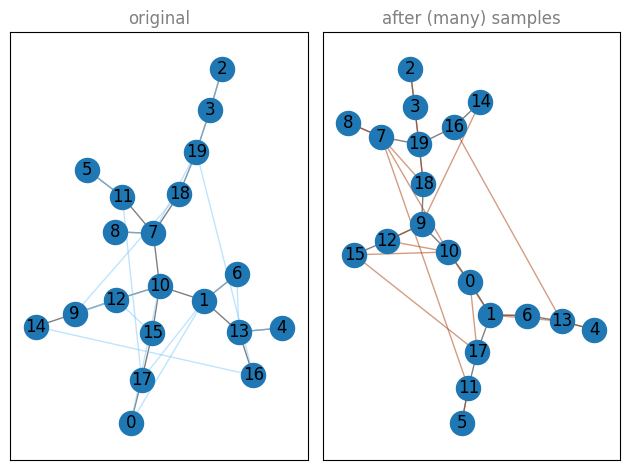

In [44]:
f,ax=plt.subplots(ncols=2, nrows=1)

# plt.subplot(121, aspect=1.2)
nx.draw_networkx(tree, pos=pos, ax=ax[0], edge_color='grey')
nx.draw_networkx_edges(
    Tree_new:=nx.from_numpy_array(-squareform(squareform((B_new:=next(tree_gen)).T@B_new, 
                                              checks=False)), create_using=nx.Graph), 
    pos=pos, edge_color='xkcd:sky', ax=ax[0]
)
ax[0].set_title('original',color='grey')
# plt.subplot(122, aspect=1.2)
nx.draw_networkx(
    Tree_new, pos=(new_pos:=nx.kamada_kawai_layout(Tree_new)), ax=ax[1], edge_color='grey'
)
nx.draw_networkx_edges(tree, pos=new_pos, edge_color='xkcd:rust', ax=ax[1])
ax[1].set_title('after (many) samples',color='grey',)
f.patch.set_alpha(0.)
ax[0].patch.set_alpha(0.)
ax[1].patch.set_alpha(0.)
plt.tight_layout()

In [ ]:
from scipy.sparse import coo_array
from scipy.sparse.csgraph import minimum_spanning_tree
from affinis.distance import generalized_graph_dists


mst=minimum_spanning_tree(generalized_graph_dists(L, beta=1)).tocoo()

# plt.spy(coo_array((np.ones(19), (np.arange(19),mst.col))))
# hinton()
B_tree=utils.sparse_adj_to_incidence(mst).todense()
hinton(B_tree.T@B_tree)
B_tree

<3x4 sparse array of type '<class 'numpy.float64'>'
	with 3 stored elements in COOrdinate format>

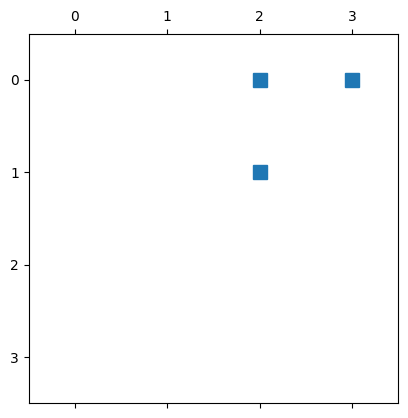

In [122]:
# utils._upper_triangular_to_symmetric(
sel=np.random.choice(np.arange(20), 4)
plt.spy(minimum_spanning_tree(Q[sel][:,sel]))
tst=minimum_spanning_tree(Q[sel][:,sel]).tocoo()
n=tst.col.shape[0]
ones,idx=np.ones(n), np.arange(n)
coo_array((ones, (idx,tst.row)), shape=(n,tst.shape[0]))

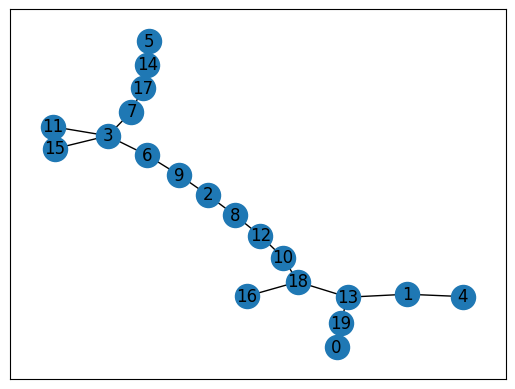

In [69]:
nx.draw_networkx(nx.from_numpy_matrix(np.diag(np.abs(B_tree).sum(axis=0))-B_tree.T@B_tree), pos=pos)

In [8]:
np.linalg.inv(
    (Vhalf:=np.diag(np.sqrt(np.diag(Q))))
    @(W:=L+np.eye(L.shape[0]))@Vhalf
)

Ωinv = Vhalf@W@Vhalf
-Ωinv/np.sqrt(np.multiply.outer(ωii:=np.diag(Ωinv), ωii))
# hinton(np.linalg.inv(Ωinv))

array([[-1.        , -0.        , -0.        , -0.        ,  0.33333333,
         0.33333333, -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -1.        , -0.        ,  0.40824829, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -1.        , -0.        , -0.        ,
        -0.        ,  0.40824829, -0.        , -0.        ,  0.33333333],
       [-0.        ,  0.40824829, -0.        , -1.        , -0.        ,
         0.33333333, -0.        , -0.        , -0.        , -0.        ],
       [ 0.33333333, -0.        , -0.        , -0.        , -1.        ,
        -0.        , -0.        ,  0.28867513, -0.        , -0.        ],
       [ 0.33333333, -0.        , -0.        ,  0.33333333, -0.        ,
        -1.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        ,  0.40824829, -0.        , -0.        ,
        -0.        , -1.        , -0.        

In [9]:
-W/np.sqrt(np.multiply.outer(wii:=np.diag(W), wii))

array([[-1.        , -0.        , -0.        , -0.        ,  0.33333333,
         0.33333333, -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -1.        , -0.        ,  0.40824829, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -1.        , -0.        , -0.        ,
        -0.        ,  0.40824829, -0.        , -0.        ,  0.33333333],
       [-0.        ,  0.40824829, -0.        , -1.        , -0.        ,
         0.33333333, -0.        , -0.        , -0.        , -0.        ],
       [ 0.33333333, -0.        , -0.        , -0.        , -1.        ,
        -0.        , -0.        ,  0.28867513, -0.        , -0.        ],
       [ 0.33333333, -0.        , -0.        ,  0.33333333, -0.        ,
        -1.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        ,  0.40824829, -0.        , -0.        ,
        -0.        , -1.        , -0.        

In [10]:
np.exp(-generalized_graph_dists(L))

array([[1.00000000e+00, 6.53469550e-02, 1.79527639e-02, 1.49535148e-01,
        3.77785130e-01, 3.82653566e-01, 7.83259526e-03, 1.32291969e-01,
        5.20225106e-02, 4.64633282e-02],
       [6.53469550e-02, 1.00000000e+00, 1.17315845e-03, 4.37000638e-01,
        2.46871079e-02, 1.70773150e-01, 5.11836250e-04, 8.64487734e-03,
        3.39951266e-03, 3.03623702e-03],
       [1.79527639e-02, 1.17315845e-03, 1.00000000e+00, 2.68456920e-03,
        4.75210971e-02, 6.86968911e-03, 4.36289104e-01, 1.35705622e-01,
        5.33648958e-02, 3.86385663e-01],
       [1.49535148e-01, 4.37000638e-01, 2.68456920e-03, 1.00000000e+00,
        5.64921554e-02, 3.90784671e-01, 1.17124829e-03, 1.97822991e-02,
        7.77919382e-03, 6.94790066e-03],
       [3.77785130e-01, 2.46871079e-02, 4.75210971e-02, 5.64921554e-02,
        1.00000000e+00, 1.44560827e-01, 2.07329369e-02, 3.50177808e-01,
        1.37703966e-01, 1.22988769e-01],
       [3.82653566e-01, 1.70773150e-01, 6.86968911e-03, 3.90784671e-01,
   

In [27]:
from itertools import islice
trees=list(islice(tree_gen, 50))
trees[0]

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.],
       [ 0.,  1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0., -1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., -1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  1.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0., -1.,  0.,  0.]])

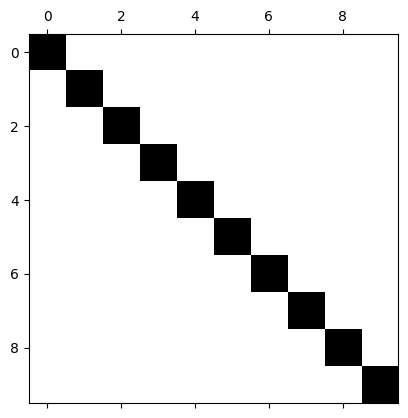

In [38]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()

im = ax.spy(B.T@B)

def update_hinton(i):
    # im_normed = np.random.rand(6, 6)
    # ax.imshow(im_normed)
    # ax.set_axis_off()
    B = trees[i]
    im.set_data(B.T@B)
    # anim=hinton(B.T@B, ax=ax)
    return (im,)
anim = FuncAnimation(fig, update_hinton, frames=50, interval=50)
HTML(anim.to_html5_video())
# plt.show()

/tmp/ipykernel_2950220/2047243182.py:5: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(tree, pos=pos, edgelist=[to_del.tolist()], edge_color='r', width=3)


(EdgeView([(0, 7), (0, 2), (1, 5), (1, 9), (2, 9), (3, 8), (4, 8), (4, 5), (5, 6)]),
 array([2, 0]))

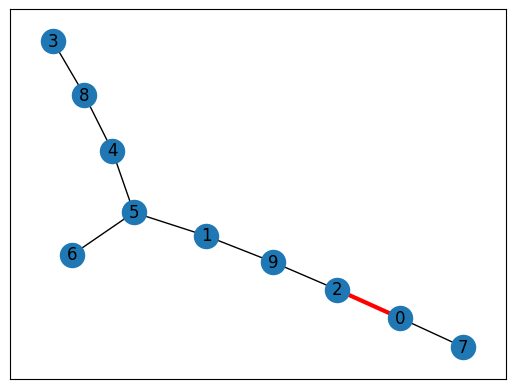

In [11]:
# squareform(A)*np.tril_indices(10)
nx.draw_networkx(tree, pos=pos)
which_del=np.random.choice(9)
to_del =np.array(np.where(A*np.tril(np.ones(10))))[:,which_del]
nx.draw_networkx_edges(tree, pos=pos, edgelist=[to_del.tolist()], edge_color='r', width=3)

tree.edges, to_del

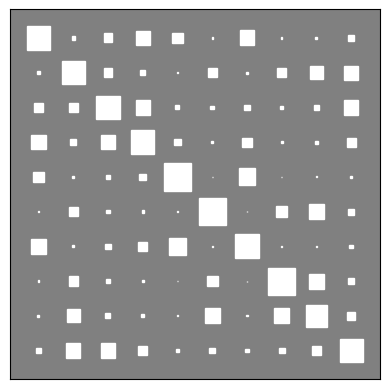

In [29]:
hinton(Q)

In [12]:
np.outer(Q[4]-Q[2], Q[:,4]-Q[:,2])

array([[ 0.00116687, -0.00542249, -0.01445998, -0.00189902,  0.02072902,
         0.00729863, -0.00090375, -0.00090375, -0.0018075 , -0.00379803],
       [-0.00542249,  0.02519864,  0.06719637,  0.00882484, -0.09632897,
        -0.03391715,  0.00419977,  0.00419977,  0.00839955,  0.01764968],
       [-0.01445998,  0.06719637,  0.17919032,  0.02353291, -0.25687726,
        -0.09044575,  0.01119939,  0.01119939,  0.02239879,  0.04706581],
       [-0.00189902,  0.00882484,  0.02353291,  0.00309056, -0.03373546,
        -0.01187816,  0.00147081,  0.00147081,  0.00294161,  0.00618111],
       [ 0.02072902, -0.09632897, -0.25687726, -0.03373546,  0.36824493,
         0.12965798, -0.01605483, -0.01605483, -0.03210966, -0.06747093],
       [ 0.00729863, -0.03391715, -0.09044575, -0.01187816,  0.12965798,
         0.0456522 , -0.00565286, -0.00565286, -0.01130572, -0.02375632],
       [-0.00090375,  0.00419977,  0.01119939,  0.00147081, -0.01605483,
        -0.00565286,  0.00069996,  0.00069996

array([[ 0.,  0.,  0.,  0., -1.,  0.,  1.,  0.,  0.,  0.]])

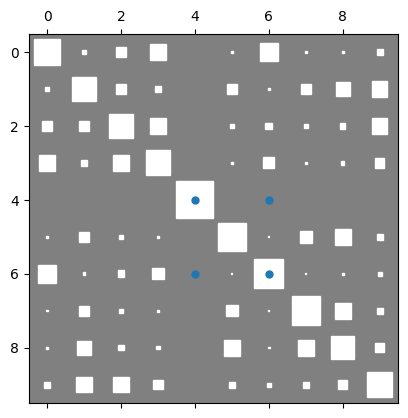

In [31]:
# u=np.diff(np.eye(10)[to_del], axis=0)[:,...].T

# u=B[which_del,:,np.newaxis]
u = np.atleast_2d(B[which_del])
subtreeQ = np.copy(Q)
_rank1_downdate(subtreeQ, u)
hinton(subtreeQ)
plt.spy(np.outer(u,u), marker='.')
# hinton(forest(L-np.multiply.outer(u,u)))
# np.diff(np.eye(10)[to_del], axis=0)
u

In [32]:
%timeit _rank1_downdate(np.copy(Q), u)

15 µs ± 238 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
%timeit forest(L - np.outer(u,u))

32 µs ± 1.57 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [35]:
# tree.remove_edge(*list(tree.edges)[np.random.choice(9)])
squareform(np.isclose(subtreeQ, np.zeros(10)))

array([ True,  True,  True,  True, False,  True, False,  True,  True,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
        True, False, False,  True, False,  True, False, False,  True,
       False,  True,  True,  True, False, False,  True,  True, False])

In [36]:
bridge_p = squareform(Q, checks=False)*squareform(np.isclose(subtreeQ, np.zeros(10)))
bridge_p

array([0.02230216, 0.00719424, 0.04460432, 0.01438849, 0.        ,
       0.14172662, 0.        , 0.0057554 , 0.0028777 , 0.        ,
       0.        , 0.        , 0.01115108, 0.        , 0.01115108,
       0.        , 0.        , 0.        , 0.        , 0.00359712,
       0.        , 0.00359712, 0.        , 0.        , 0.        ,
       0.02230216, 0.        , 0.02230216, 0.        , 0.        ,
       0.00719424, 0.        , 0.00719424, 0.        , 0.        ,
       0.07086331, 0.        , 0.0028777 , 0.00143885, 0.07086331,
       0.        , 0.        , 0.0028777 , 0.00143885, 0.        ])

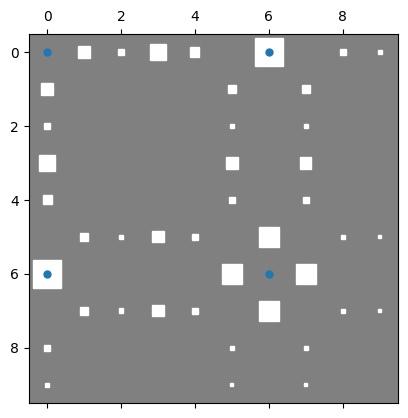

In [37]:
def softmax(x):
    return(np.exp(x - np.max(x)) / np.exp(x - np.max(x)).sum())
hinton(squareform(bridge_p/bridge_p.sum()))
plt.spy(np.outer(u,u), marker='.')

(array([4, 3]), array([4, 5]))

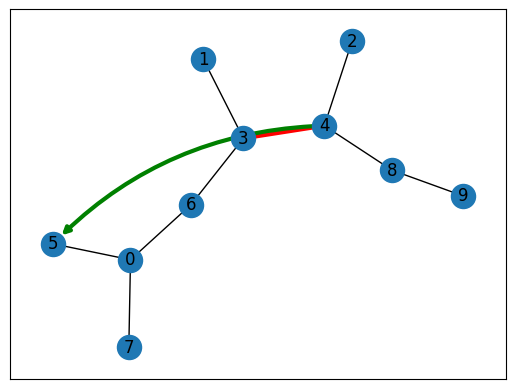

In [38]:
new_e = np.eye(45)[np.random.choice(45,p=bridge_p/bridge_p.sum())]
new_A = squareform(
    -squareform(L-np.outer(u,u), checks=False)  # A/e
    + 
    new_e  # e'
)
to_add=np.where(squareform(new_e)!=0)[0]

# pos=nx.layout.kamada_kawai_layout(tree)

nx.draw_networkx(tree, pos=pos)
nx.draw_networkx_edges(tree, pos=pos, edgelist=[to_del.tolist()], edge_color='r', width=3)
nx.draw_networkx_edges(nx.from_numpy_array(new_A, create_using=nx.DiGraph), edgelist=[to_add.tolist()], 
                       pos=pos,connectionstyle='arc3,rad=0.2', edge_color='g', width=3)
to_del, to_add

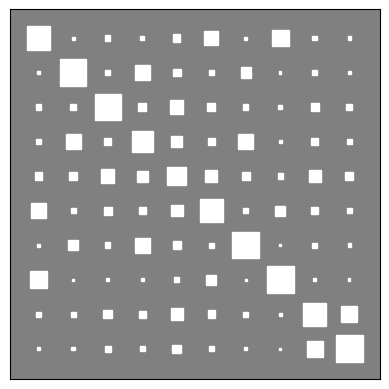

In [50]:
hinton(_rank1_update(subtreeQ, np.diff(np.eye(10)[to_add], axis=0)))

In [52]:
np.allclose(
    _rank1_update(subtreeQ, np.diff(np.eye(10)[to_add], axis=0)), # cheap way
    forest(np.diag(new_A.sum(axis=1))-new_A)  # true way
)  # same? 

True

In [97]:
new_B=np.copy(B)
new_Q = forest(new_B.T@new_B)

for i in range(B.shape[0]): 
    new_Q = _rank1_downdate(new_Q, new_B[i])
    # new_Q = _rank1_downdate(forest(new_B.T@new_B), new_B[i])
    bridge_p = squareform(Q, checks=False)*squareform(np.isclose(new_Q, np.zeros(B.shape[1])))
    new_edge = np.eye(bridge_p.shape[0])[np.random.choice(bridge_p.shape[0],p=bridge_p/bridge_p.sum())]
    new_e = np.diff(np.eye(B.shape[1])[coo_array(squareform(new_edge)).row], axis=0)
    new_Q = _rank1_update(new_Q, new_e)
    new_B[i] = new_e
    new_A = squareform(
        -squareform(L-np.outer(u,u), checks=False)  # A/e
        + 
        new_e  # e'
    )
new_L = new_B.T@new_B
new_A = np.diag(np.diag(new_L)) - new_L
new_T = nx.from_numpy_array(new_A)

f,ax=plt.subplots(ncols=2)
nx.draw_networkx(tree, pos=pos, ax=ax[0])
nx.draw_networkx(new_T, pos=nx.layout.kamada_kawai_layout(new_T), edge_color='g', width=2, ax=ax[1])

ImportError: cannot import name '_random_tree_jump' from 'affinis.sample' (/home/tbsexton/Sync/code/affinis/affinis/sample.py)

In [25]:
new_B[0]

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  1.,  0.,  0.])

In [534]:
forest(L)

array([[0.38040346, 0.00720461, 0.01440922, 0.19020173, 0.00864553,
        0.00720461, 0.04322767, 0.14121037, 0.01729107, 0.19020173],
       [0.00720461, 0.59293948, 0.18587896, 0.00360231, 0.01152738,
        0.09293948, 0.05763689, 0.02161383, 0.02305476, 0.00360231],
       [0.01440922, 0.18587896, 0.37175793, 0.00720461, 0.02305476,
        0.18587896, 0.11527378, 0.04322767, 0.04610951, 0.00720461],
       [0.19020173, 0.00360231, 0.00720461, 0.59510086, 0.00432277,
        0.00360231, 0.02161383, 0.07060519, 0.00864553, 0.09510086],
       [0.00864553, 0.01152738, 0.02305476, 0.00432277, 0.61383285,
        0.01152738, 0.06916427, 0.0259366 , 0.22766571, 0.00432277],
       [0.00720461, 0.09293948, 0.18587896, 0.00360231, 0.01152738,
        0.59293948, 0.05763689, 0.02161383, 0.02305476, 0.00360231],
       [0.04322767, 0.05763689, 0.11527378, 0.02161383, 0.06916427,
        0.05763689, 0.34582133, 0.129683  , 0.13832853, 0.02161383],
       [0.14121037, 0.02161383, 0.0432276

ImportError: cannot import name '_random_tree_walk' from 'affinis.sample' (/home/tbsexton/Sync/code/affinis/affinis/sample.py)

In [549]:
from scipy.linalg import inv as scinv
from numpy.linalg import inv as npinv
from scipy.sparse.linalg import inv as spinv
from scipy.linalg import lapack

from functools import lru_cache


@lru_cache
def inds_cache(n): 
    return np.tri(n, k=-1, dtype=bool)

def upper_triangular_to_symmetric(ut):
    n = ut.shape[0]
    inds = inds_cache(n)
    ut[inds] = ut.T[inds]

def fast_positive_definite_inverse(m):
    cholesky, info = lapack.dpotrf(m)
    if info != 0:
        raise ValueError('dpotrf failed on input {}'.format(m))
    inv, info = lapack.dpotri(cholesky)
    if info != 0:
        raise ValueError('dpotri failed on input {}'.format(cholesky))
    upper_triangular_to_symmetric(inv)
    return inv

In [550]:
%timeit scinv(L+np.eye(10))
%timeit npinv(L+np.eye(10))
%timeit spinv(csr_array(L+np.eye(10)))
%timeit fast_positive_definite_inverse(L+np.eye(10))

24.2 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
18.4 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.37 ms ± 83.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.1 µs ± 141 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [73]:
%timeit np.eye(50)[1] - np.eye(50)[5]
%timeit np.diff(np.eye(50)[[1,5]], axis=0)

6.42 µs ± 16.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
9.76 µs ± 28.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [74]:
np.diff(np.eye(50)[[1,5]], axis=0)

array([[ 0., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [83]:
np.arange(25).reshape((5,5)), squareform(np.arange(25).reshape((5,5)), checks=False), np.arange(25).reshape((5,5))[np.triu_indices(5, k=1)]

(array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]),
 array([ 1,  2,  3,  4,  7,  8,  9, 13, 14, 19]),
 array([ 1,  2,  3,  4,  7,  8,  9, 13, 14, 19]))

In [84]:
%timeit np.arange(25).reshape((5,5))[np.triu_indices(5, k=1)]
%timeit squareform(np.arange(25).reshape((5,5)), checks=False)

28 µs ± 127 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.69 µs ± 10.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [8]:
list(chain(*[walk[i.begin:i.end] for i in final]))

[(0, 2), (2, 1), (1, 3), (3, 6), (6, 8)]

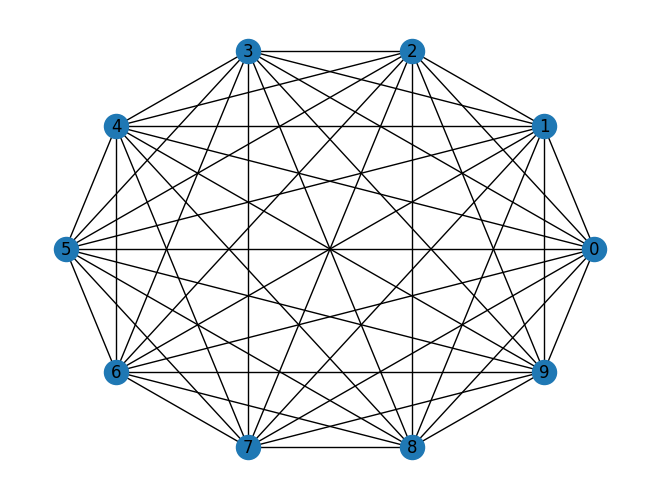

In [2]:
G = nx.complete_graph(10)
G.nodes
nx.draw_kamada_kawai(G, with_labels=True)
# nx.draw_networkx(

In [3]:
A = nx.to_numpy_array(G)
M = A/A.sum(axis=0)
M_cdf = np.cumsum(M.T, axis=1)
start=0
walk_gen = _random_walk(M_cdf, start)
# np.searchsorted(M_cdf[0], np.random.rand())
# for i in range(50): 
#     print(next(walk_gen))
# M_cdf

In [4]:
# walk = [1,1,2,3,4,2,3,4,5,5,6]
from typing import NamedTuple
from intervaltree import Interval, IntervalTree

class RandJump(NamedTuple): 
    jump_id: int
    start: int
    end: int

sink = 8
walk = list(pairwise([start]+list(takewhile(lambda x: x not in [sink], walk_gen))+[sink]))
# groupby(1, (RandJump(i,s,t) for i,(s,t) in enumerate(walk)))
cycle_start_end = mapcat(pairwise, groupby(1, (RandJump(i,s,t) for i,(s,t) in enumerate(walk))).values())

# list(cycle_start_end)
# intervals = sorted([walk[i[0].jump_id:i[1].jump_id]
#                     for i in cycle_start_end],
#                    key=lambda i: i[0][0])
# walk, intervals
intervals = sorted([Interval(from_idx:=i[0].jump_id, to_idx:=i[1].jump_id, walk[from_idx:to_idx]) 
                    for i in cycle_start_end],
                   key=lambda i: i.begin)
walk, intervals

([(0, 2), (2, 1), (1, 3), (3, 6), (6, 3), (3, 6), (6, 8)],
 [Interval(3, 5, [(3, 6), (6, 3)]), Interval(4, 6, [(6, 3), (3, 6)])])

In [5]:
tree = IntervalTree(intervals)
len(tree)
popped = []
unpopped = intervals.copy()

## NOTE sort by node visited (groupby) and then by start index
while not tree.is_empty():
    i = unpopped.pop(0)
    if i in tree and len(i.data)>1:
        tree.remove_overlap(i.begin, i.end)
        print(tree)
        popped += [i]
popped
# for i in intervals: 
#     tree.remove_overlap(intervals[0].begin, intervals[0].end)

IntervalTree()


[Interval(3, 5, [(3, 6), (6, 3)])]

In [6]:
deleted = IntervalTree(popped)
deleted.merge_overlaps()
deleted

IntervalTree([Interval(3, 5, [(3, 6), (6, 3)])])

In [7]:
final = IntervalTree([Interval(0,len(walk))])
for i in deleted: 
    final.chop(i.begin, i.end)
final

IntervalTree([Interval(0, 3), Interval(5, 7)])